# Bibliotecas/Pacotes

In [80]:
import pandas as pd

import numpy as np

from sklearn import preprocessing

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import branca.colormap as cmap

import folium

import seaborn

# Leitura do Dataset

In [5]:
data = pd.read_csv("Crimes_-_2001_to_present.csv", error_bad_lines=False)
print(data.shape)
data.head()

/home/ale/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(7086348, 22)


ID Case Number                    Date                 Block  IUCR  \
0  11034701    JA366925  01/01/2001 11:00:00 AM       016XX E 86TH PL  1153   
1  11227287    JB147188  10/08/2017 03:00:00 AM    092XX S RACINE AVE  0281   
2  11227583    JB147595  03/28/2017 02:00:00 PM       026XX W 79TH ST  0620   
3  11227293    JB147230  09/09/2017 08:17:00 PM  060XX S EBERHART AVE  0810   
4  11227634    JB147599  08/26/2017 10:00:00 AM   001XX W RANDOLPH ST  0281   

          Primary Type                          Description  \
0   DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
1  CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   
2             BURGLARY                       UNLAWFUL ENTRY   
3                THEFT                            OVER $500   
4  CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   False     False  ...   8.0            45.0        11   
1            RESIDENCE   False     False  ...  21.0            73.0        02   
2                OTHER   False     False  ...  18.0            70.0        05   
3            RESIDENCE   False     False  ...  20.0            42.0        06   
4          HOTEL/MOTEL   False     False  ...  42.0            32.0        02   

   X Coordinate Y Coordinate  Year              Updated On  Latitude  \
0           NaN          NaN  2001  08/05/2017 03:50:08 PM       NaN   
1           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   
2           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   
3           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   
4           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   

  Longitude  Location  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  

[5 rows x 22 columns]

# Pré-Processamento

In [6]:
#Exclusão de colunas redundantes
data.drop(['X Coordinate', 'Y Coordinate', 'Updated On', 'Location', 'Beat'], axis=1, inplace=True)

#Exclusão de dados com valores faltantes
data = data.dropna()
 
#Exclusão de dados duplicados
data = data.drop_duplicates()

#Criação de novas features
data['Date'] = pd.to_datetime(data['Date'] ,dayfirst=True)
data['Weekday'] = data['Date'].dt.day_name()
data['Week Number'] = data['Date'].dt.week
data['Weekend'] = [ w in ['Saturday','Sunday'] for w in data['Weekday'] ]
data['Time'] = [d.time() for d in data['Date']]
data['Date'] = [d.date() for d in data['Date']]

def toSeconds( t ):
    return (t.hour*60*60) + (t.minute*60) + t.second

data['Seconds'] = [ toSeconds(t) for t in data['Time'] ]
data['Hours'] = [ t.hour for t in data['Time'] ]

print(data.shape)
data.head()

(6407290, 23)


ID Case Number        Date                                Block  \
63347  11665567    JC234307  2019-10-04                   102XX S VERNON AVE   
63431  11667968    JC237058  2019-04-19                  002XX N LARAMIE AVE   
63432  11667963    JC235212  2019-12-04                   032XX N KEELER AVE   
63508  11668309    JC238187  2019-04-25  108XX S DR MARTIN LUTHER KING JR DR   
63914  11692179    JC261724  2019-05-13                   090XX S RACINE AVE   

       IUCR                Primary Type                     Description  \
63347  1562                 SEX OFFENSE       AGG CRIMINAL SEXUAL ABUSE   
63431  1752  OFFENSE INVOLVING CHILDREN   AGG CRIM SEX ABUSE FAM MEMBER   
63432  1754  OFFENSE INVOLVING CHILDREN  AGG SEX ASSLT OF CHILD FAM MBR   
63508  0486                     BATTERY         DOMESTIC BATTERY SIMPLE   
63914  0560                     ASSAULT                          SIMPLE   

           Location Description  Arrest  Domestic  ...  FBI Code  Year  \
63347  SCHOOL, PUBLIC, BUILDING   False     False  ...        17  2019   
63431                 RESIDENCE   False      True  ...        17  2019   
63432                 RESIDENCE   False      True  ...        02  2019   
63508                 RESIDENCE   False      True  ...       08B  2019   
63914                    STREET   False     False  ...       08A  2019   

        Latitude  Longitude    Weekday  Week Number  Weekend      Time  \
63347  41.708589 -87.612583     Friday           40    False  16:37:00   
63431  41.884865 -87.755230     Friday           16    False  13:57:00   
63432  41.940298 -87.732066  Wednesday           49    False  16:08:00   
63508  41.697609 -87.613508   Thursday           17    False  17:20:00   
63914  41.729973 -87.653167     Monday           20    False  17:26:00   

       Seconds  Hours  
63347    59820     16  
63431    50220     13  
63432    58080     16  
63508    62400     17  
63914    62760     17  

[5 rows x 23 columns]

In [7]:
data.to_csv('pre_data.csv', index = False, header=True)
#data = pd.read_csv("pre_data.csv", error_bad_lines=False)

# Análise Exploratória ( Visão Geral )

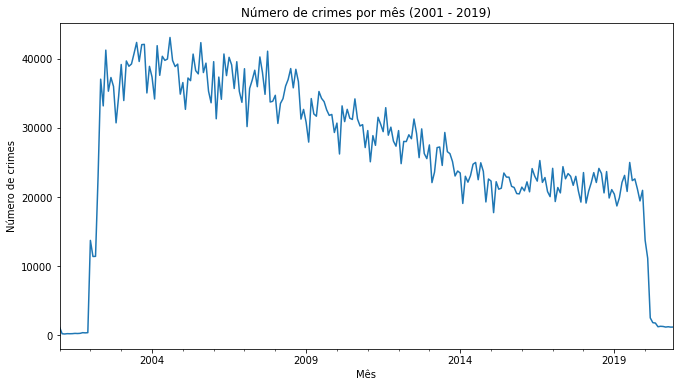

In [8]:
data.index = pd.DatetimeIndex(data.Date)

plt.figure(figsize=(11,6))
data.resample('BM').size().plot(legend=False)
plt.title('Número de crimes por mês (2001 - 2019)')
plt.xlabel('Mês')
plt.ylabel('Número de crimes')
plt.show()

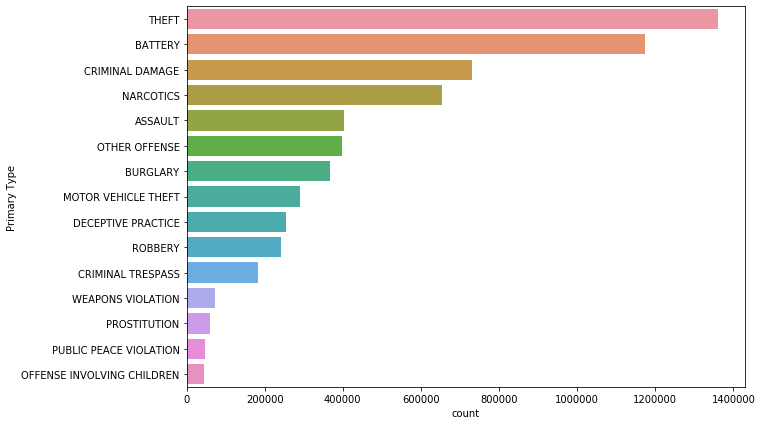

In [9]:
fig = plt.figure( figsize=(10,7) )
seaborn.countplot(y= 'Primary Type', data = data, order = data['Primary Type'].value_counts().keys()[:15] )

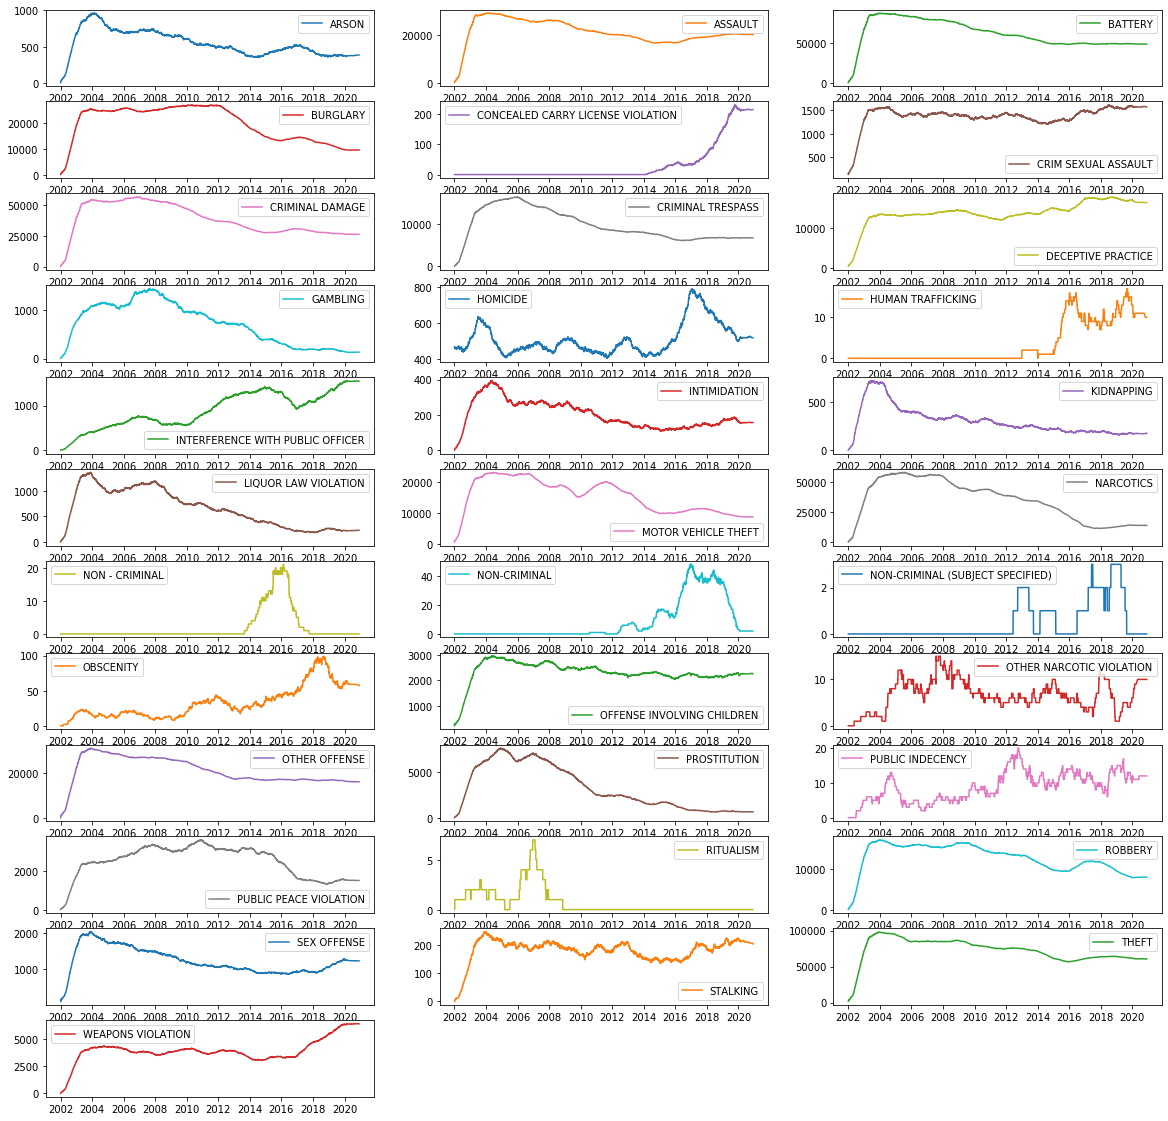

In [11]:
crimes_date = data.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=data.index.date, fill_value=0)

crimes_date.index = pd.DatetimeIndex(crimes_date.index)

plo = crimes_date.rolling(365).sum().plot(figsize=(20, 20), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

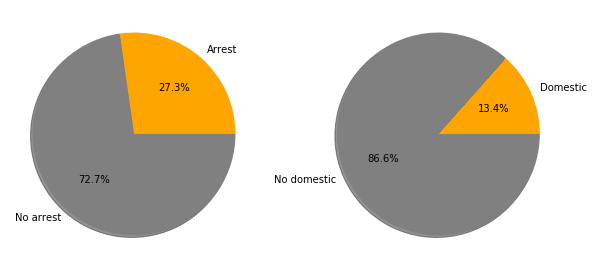

In [12]:
fig = plt.figure( figsize=(10,7) )

aux = [ data[ data['Arrest'] == True ].shape[0], data[ data['Arrest'] == False ].shape[0] ]

plt.subplot(121)

plt.pie(aux, labels=['Arrest','No arrest'],autopct='%1.1f%%',shadow=True,colors=['orange','gray'])

aux = [ data[ data['Domestic'] == True ].shape[0], data[ data['Domestic'] == False ].shape[0] ]

plt.subplot(122)

plt.pie(aux, labels=['Domestic','No domestic'],autopct='%1.1f%%',shadow=True,colors=['orange','gray'])

plt.show()

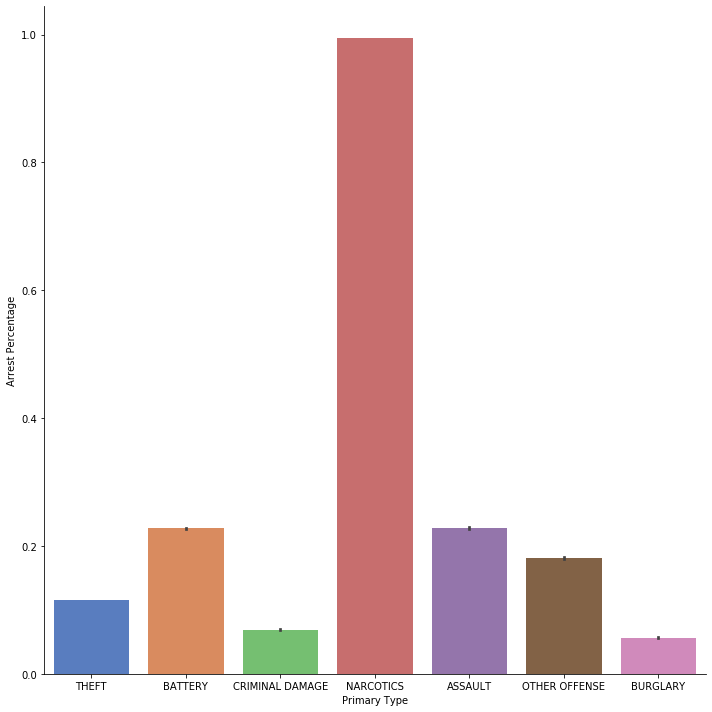

In [16]:
s = seaborn.catplot(x="Primary Type", y="Arrest", data=data
                ,kind="bar", palette="muted", height=10
                ,order = data['Primary Type'].value_counts().keys()[:7] )
s.set_ylabels("Arrest Percentage")

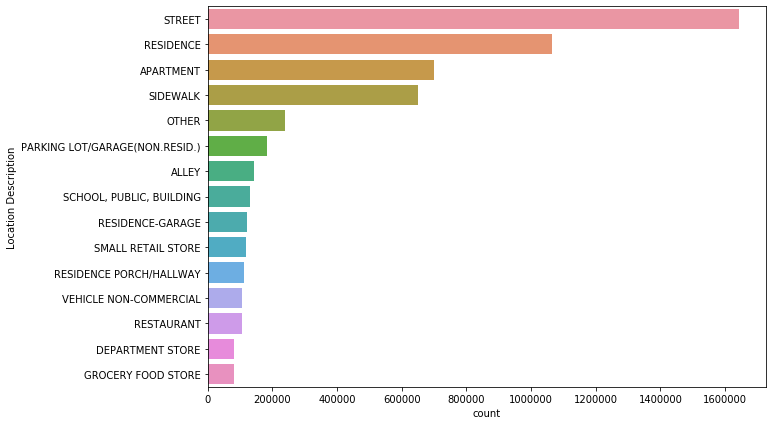

In [17]:
fig = plt.figure( figsize=(10,7) )

seaborn.countplot(y= 'Location Description', data = data, 
                  order = data['Location Description'].value_counts().keys()[:15] )

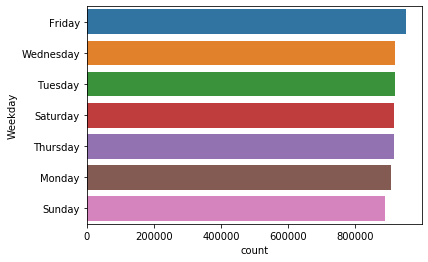

In [18]:
seaborn.countplot(y= 'Weekday', data = data, 
                  order = data['Weekday'].value_counts().keys() )

# Análise Exploratória ( Mapa )

In [23]:
data_plot_mapa = data.sample(5000,random_state=40)

In [24]:
mapa = folium.Map(location=[41.8379,-87.6828], tiles='CartoDB dark_matter',zoom_start=11)

for (la,lo) in zip( data_plot_mapa['Latitude'].values, data_plot_mapa['Longitude'].values  ):
    
    folium.CircleMarker(location = [la,lo], fill = True,
                        radius=2, color='red').add_to(mapa)

mapa

In [25]:
mapa_district = folium.Map(location=[41.8379,-87.6828], tiles='CartoDB dark_matter',zoom_start=11)

#Contando a quantidade de registros de cada distrito
q = {}
for d in range(40):
    q[d] = (data[ data['District'] == d ].shape[0])

In [26]:
colormap = cmap.linear.YlOrRd_09.scale( min(q.values()), max(q.values()) )
colormap

In [27]:
#Adicionando ao mapa a divisão dos distritos

import json
distritos = 'chicago_police_districts.geojson'
geo_json_data = json.load(open(distritos))

folium.GeoJson(
    geo_json_data,
    style_function=lambda f: {
        'fillColor': colormap(q[ int(f['properties']['dist_num']) ]),
        'color': 'green',
        'weight': 1,
        #'dashArray': '5, 5'
    }
    
).add_to(mapa_district)

In [28]:
for d in np.sort( data['District'].unique() ):
    la = data[ data['District'] == d ]['Latitude'].mean()
    lo = data[ data['District'] == d ]['Longitude'].mean()
    arrest = (data[ data['District'] == d  ][ 'Arrest'].sum())/(data[ data['District'] == d  ].shape[0])
    popup_text = """<strong>District: </strong> {}, </br>
                    <strong>Total Crimes: </strong> {}, </br>
                    <Strong>Arrest Percent: </strong> {}%
                 """
    popup_text = popup_text.format(d,q[d],arrest*100)
    folium.CircleMarker(location = [la,lo], popup= popup_text, fill = True,
                        radius=10, color='white',tooltip=("District " + str(d)) ).add_to(mapa_district)

In [29]:
colormap.add_to(mapa_district)

mapa_district

In [81]:
mask1 = (data['Primary Type']=='NARCOTICS') | (data['Primary Type']=='ASSAULT') 
mask2 = (data['Primary Type']=='HOMICIDE') | (data['Primary Type']=='CRIM SEXUAL ASSAULT')
mask3 = (data['Primary Type']=='SEX OFFENSE') | (data['Primary Type']=='STALKING')
mask4 = (data['Primary Type']=='WEAPONS VIOLATION')|(data['Primary Type']=='BATTERY')
mask5 = (data['Primary Type']=='PUBLIC PEACE VIOLATION') | (data['Primary Type']=='MOTOR VEHICLE THEFT')
data_main_crimes = data[mask1|mask2|mask3|mask4|mask5]
print(data_main_crimes.shape)
print(data_main_crimes['Primary Type'].value_counts())

(2701547, 23)
BATTERY                   1172878
NARCOTICS                  653730
ASSAULT                    403599
MOTOR VEHICLE THEFT        290494
WEAPONS VIOLATION           72823
PUBLIC PEACE VIOLATION      46107
CRIM SEXUAL ASSAULT         25800
SEX OFFENSE                 23022
HOMICIDE                     9744
STALKING                     3350
Name: Primary Type, dtype: int64


# Clusterização

In [60]:
sub_data0 = data_main_crimes.loc[:,['Latitude', 'Longitude', 'Week Number','Seconds']]

scaler = preprocessing.StandardScaler()

sub_data0[sub_data0.columns] = scaler.fit_transform(sub_data0)
sub_data0.head()

Latitude  Longitude  Week Number   Seconds
Date                                                  
2019-10-04 -1.431384   0.979024     0.918370  0.383450
2019-04-25 -1.556787   0.964060    -0.644927  0.488429
2019-05-13 -1.187149   0.322146    -0.441018  0.503077
2019-05-17 -1.098581  -0.469308    -0.441018 -0.414874
2019-05-18 -1.289306   1.287263    -0.441018 -0.475907

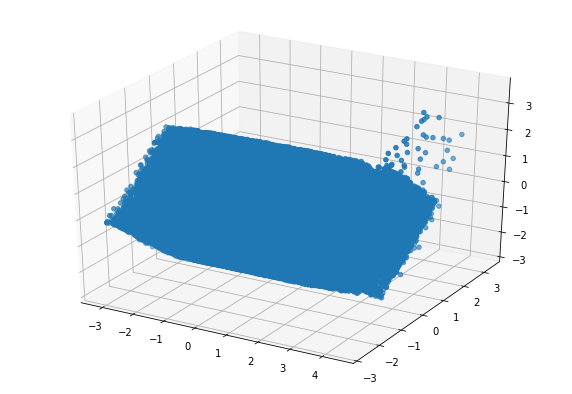

In [32]:
pc = PCA(3)
sub_data0_= pc.fit_transform(sub_data0)

fig = plt.figure( figsize=(10,7) )
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs=sub_data0_[:,0] ,ys=sub_data0_[:,1], zs=sub_data0_[:,2])
plt.show()

In [ ]:
scores = np.zeros(20)
inertias = np.zeros(20)
for k in range(20):
    model = KMeans(n_clusters=k+1)
    model.fit(sub_data0_)
    sco
    res[k] = model.score(sub_data0_)
    inertias[k] = model.inertia_


fig = plt.figure( figsize=(10,7) )

plt.subplot(211)

plt.plot( range(1,21), scores  )
plt.xlabel("k")
plt.ylabel("Score")

plt.subplot(212)

plt.plot( range(1,21), inertias )
plt.xlabel("k")
plt.ylabel("Inertia")

plt.show()

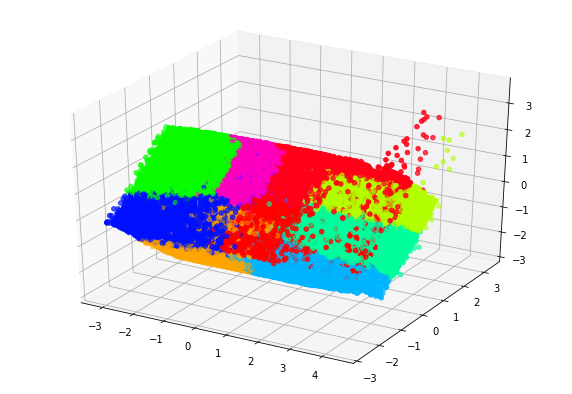

In [34]:
model = KMeans(n_clusters=10)
model.fit(sub_data0_)

fig = plt.figure( figsize=(10,7) )
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs=sub_data0_[:,0] ,ys=sub_data0_[:,1], zs=sub_data0_[:,2], c=model.labels_, cmap='hsv' )
plt.show()

In [61]:
sub_data0['Cluster'] = model.labels_

sub_data0.head()

Latitude  Longitude  Week Number   Seconds  Cluster
Date                                                           
2019-10-04 -1.431384   0.979024     0.918370  0.383450        7
2019-04-25 -1.556787   0.964060    -0.644927  0.488429        3
2019-05-13 -1.187149   0.322146    -0.441018  0.503077        3
2019-05-17 -1.098581  -0.469308    -0.441018 -0.414874        8
2019-05-18 -1.289306   1.287263    -0.441018 -0.475907        3

In [82]:
data_main_crimes[ "Cluster" ] = sub_data0.Cluster

/home/ale/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
data_main_crimes.head()

ID Case Number        Date  \
Date                                           
2019-10-04  11665567    JC234307  2019-10-04   
2019-04-25  11668309    JC238187  2019-04-25   
2019-05-13  11692179    JC261724  2019-05-13   
2019-05-17  11694262    JC266697  2019-05-17   
2019-05-18  11692296    JC268099  2019-05-18   

                                          Block  IUCR Primary Type  \
Date                                                                 
2019-10-04                   102XX S VERNON AVE  1562  SEX OFFENSE   
2019-04-25  108XX S DR MARTIN LUTHER KING JR DR  0486      BATTERY   
2019-05-13                   090XX S RACINE AVE  0560      ASSAULT   
2019-05-17                   085XX S KEDZIE AVE  0580     STALKING   
2019-05-18                   095XX S AVALON AVE  0486      BATTERY   

                          Description      Location Description  Arrest  \
Date                                                                      
2019-10-04  AGG CRIMINAL SEXUAL ABUSE  SCHOOL, PUBLIC, BUILDING   False   
2019-04-25    DOMESTIC BATTERY SIMPLE                 RESIDENCE   False   
2019-05-13                     SIMPLE                    STREET   False   
2019-05-17                     SIMPLE                   LIBRARY   False   
2019-05-18    DOMESTIC BATTERY SIMPLE                 RESIDENCE   False   

            Domestic  ...  Year   Latitude  Longitude   Weekday  Week Number  \
Date                  ...                                                      
2019-10-04     False  ...  2019  41.708589 -87.612583    Friday           40   
2019-04-25      True  ...  2019  41.697609 -87.613508  Thursday           17   
2019-05-13     False  ...  2019  41.729973 -87.653167    Monday           20   
2019-05-17     False  ...  2019  41.737728 -87.702065    Friday           20   
2019-05-18      True  ...  2019  41.721029 -87.593539  Saturday           20   

            Weekend      Time Seconds  Hours  Cluster  
Date                                                   
2019-10-04    False  16:37:00   59820     16        7  
2019-04-25    False  17:20:00   62400     17        3  
2019-05-13    False  17:26:00   62760     17        3  
2019-05-17    False  11:10:00   40200     11        8  
2019-05-18     True  10:45:00   38700     10        3  

[5 rows x 24 columns]

## Análise de Cluster

In [84]:
data0_Cluster_0 = data_main_crimes[ data_main_crimes['Cluster'] == 0 ]
#data0_Cluster_0 = sub_data0[ sub_data0['Cluster'] == 0 ]

In [85]:
data0_Cluster_0

ID Case Number        Date                   Block  IUCR  \
Date                                                                         
2019-01-03  11629399    JC193182  2019-01-03     020XX W MC LEAN AVE  0281   
2019-05-21  11694441    JC271974  2019-05-21      039XX W MADISON ST  2017   
2019-05-22  11695251    JC273062  2019-05-22  008XX N LEAMINGTON AVE  2027   
2019-05-23  11697189    JC275427  2019-05-23      011XX N HAMLIN AVE  0486   
2019-05-24  11698231    JC276566  2019-05-24      002XX S PULASKI RD  1563   
...              ...         ...         ...                     ...   ...   
2015-03-18   9999888    HY189869  2015-03-18       048XX N AVERS AVE  0910   
2015-03-18   9999925    HY189894  2015-03-18     004XX S LARAMIE AVE  0910   
2015-03-18   9999998    HY188874  2015-03-18     036XX W BELMONT AVE  0460   
2019-05-26  11700037    JC278815  2019-05-26     046XX W MC LEAN AVE  0460   
2019-05-26     24560    JC279072  2019-05-26     013XX W HASTINGS ST  0110   

                   Primary Type              Description  \
Date                                                       
2019-01-03  CRIM SEXUAL ASSAULT           NON-AGGRAVATED   
2019-05-21            NARCOTICS       MANU/DELIVER:CRACK   
2019-05-22            NARCOTICS              POSS: CRACK   
2019-05-23              BATTERY  DOMESTIC BATTERY SIMPLE   
2019-05-24          SEX OFFENSE    CRIMINAL SEXUAL ABUSE   
...                         ...                      ...   
2015-03-18  MOTOR VEHICLE THEFT               AUTOMOBILE   
2015-03-18  MOTOR VEHICLE THEFT               AUTOMOBILE   
2015-03-18              BATTERY                   SIMPLE   
2019-05-26              BATTERY                   SIMPLE   
2019-05-26             HOMICIDE      FIRST DEGREE MURDER   

              Location Description  Arrest  Domestic  ...  Year   Latitude  \
Date                                                  ...                    
2019-01-03               RESIDENCE   False     False  ...  2019  41.918503   
2019-05-21                SIDEWALK    True     False  ...  2019  41.880751   
2019-05-22                SIDEWALK    True     False  ...  2019  41.895939   
2019-05-23               APARTMENT   False      True  ...  2019  41.901679   
2019-05-24  VEHICLE NON-COMMERCIAL   False     False  ...  2019  41.877758   
...                            ...     ...       ...  ...   ...        ...   
2015-03-18                  STREET   False     False  ...  2015  41.969105   
2015-03-18                  STREET   False     False  ...  2015  41.874484   
2015-03-18               RESIDENCE   False     False  ...  2015  41.939208   
2019-05-26               RESIDENCE    True     False  ...  2019  41.917879   
2019-05-26         CHA PARKING LOT    True     False  ...  2019  41.864278   

            Longitude    Weekday  Week Number  Weekend      Time Seconds  \
Date                                                                       
2019-01-03 -87.678795   Thursday            1    False  05:00:00   18000   
2019-05-21 -87.723856    Tuesday           21    False  09:27:00   34020   
2019-05-22 -87.754403  Wednesday           21    False  00:02:00     120   
2019-05-23 -87.721398   Thursday           21    False  12:00:00   43200   
2019-05-24 -87.725570     Friday           21    False  11:30:00   41400   
...               ...        ...          ...      ...       ...     ...   
2015-03-18 -87.724427  Wednesday           12    False  07:00:00   25200   
2015-03-18 -87.754843  Wednesday           12    False  11:00:00   39600   
2015-03-18 -87.718022  Wednesday           12    False  04:00:00   14400   
2019-05-26 -87.742535     Sunday           21     True  00:10:00     600   
2019-05-26 -87.659660     Sunday           21     True  06:48:00   24480   

            Hours  Cluster  
Date                        
2019-01-03      5        0  
2019-05-21      9        0  
2019-05-22      0        0  
2019-05-23     12        0  
2019-05-24     11        0  
...           .

In [86]:
def plot_hmap(df, xs, ix=None):
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap='Reds')
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]),xs)
    plt.grid(False)

### Cluster0

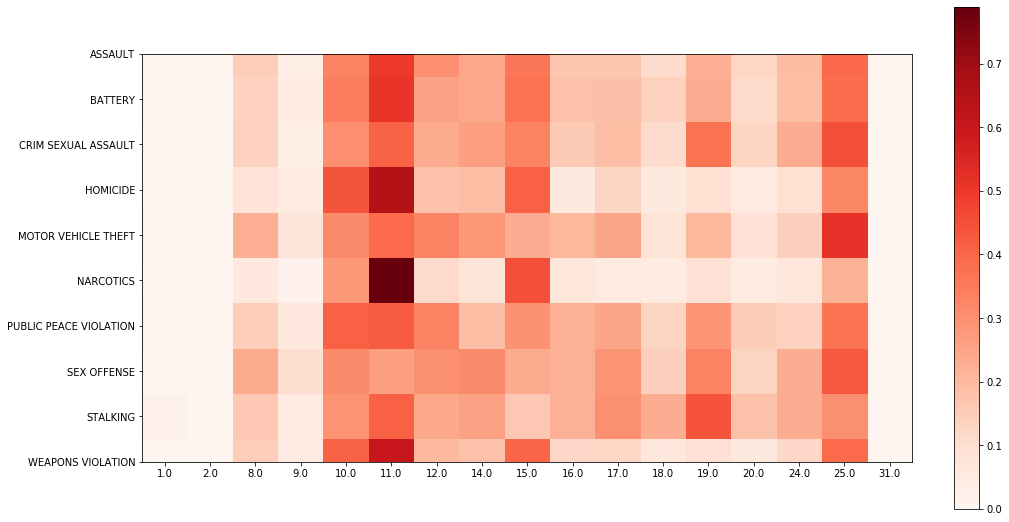

In [88]:
normalize = preprocessing.Normalizer()
crime_by_district_C0 = data0_Cluster_0.pivot_table(values='ID', index='Primary Type', columns=['District'], aggfunc=np.size).fillna(0)
crime_by_district_C0[crime_by_district_C0.columns] = normalize.fit_transform(crime_by_district_C0)

crime_by_hour_C0 = data0_Cluster_0.pivot_table(values='ID', index='Primary Type', columns=['Hours'], aggfunc=np.size).fillna(0)
crime_by_hour_C0[crime_by_hour_C0.columns] = normalize.fit_transform(crime_by_hour_C0)

crime_by_week_C0 = data0_Cluster_0.pivot_table(values='ID', index='Primary Type', columns=['Weekday'], aggfunc=np.size).fillna(0)
crime_by_week_C0[crime_by_week_C0.columns] = normalize.fit_transform(crime_by_week_C0)

plt.figure(figsize=(15,10))
plot_hmap(crime_by_district_C0, crime_by_district_C0.columns)
plt.show()

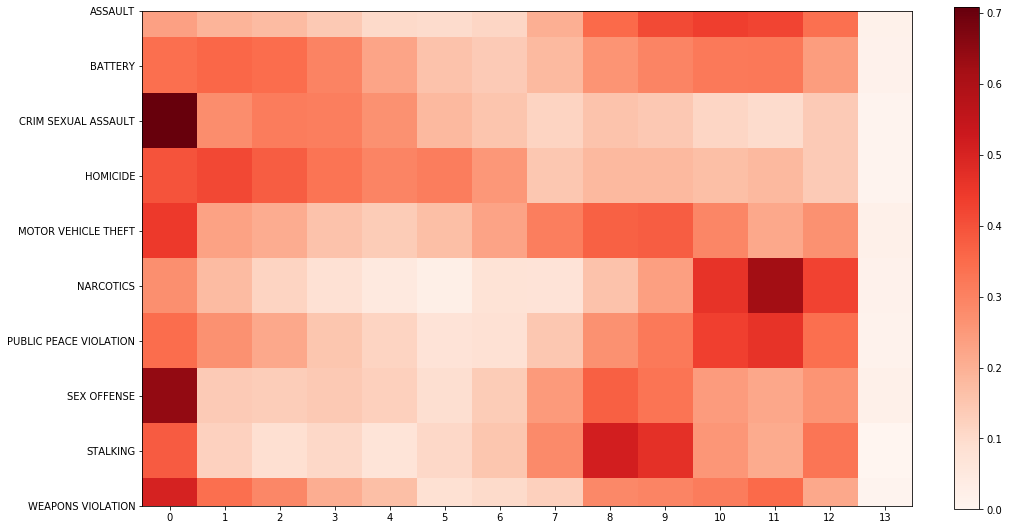

In [89]:
plt.figure(figsize=(15,10))
plot_hmap(crime_by_hour_C0, crime_by_hour_C0.columns)

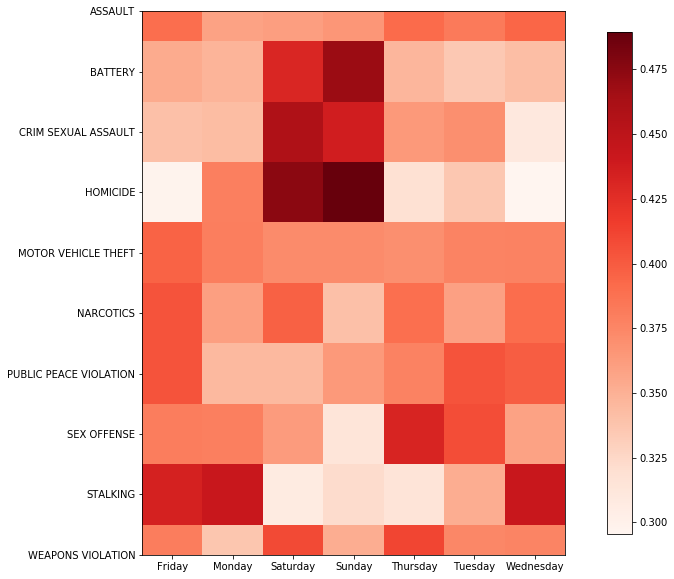

In [90]:
plt.figure(figsize=(15,10))
plot_hmap(crime_by_week_C0, crime_by_week_C0.columns)